In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
#from nltk.tokenize import tokenize
%matplotlib inline
import re
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")
chachedWords = stopwords.words('english')
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\unesp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('./Health-Tweets/goodhealth.txt',names=['col1'])

In [3]:
df2 = df.col1.str.extractall(r'(?P<name>[A-Z ]+[A-Z]):(?P<value>[A-Z /]+[A-Z])', flags=re.I)\
    .reset_index(level=1, drop=True)

In [4]:
df2["string_value"] = df2["name"] +' '+df2["value"]
df2.head(10)

,name,value,string_value
0,KristinMcGee has an awesome plyometric move yo...,http,KristinMcGee has an awesome plyometric move yo...
1,mimichatter,http,mimichatter http
2,myths and facts you really need to know about...,http,myths and facts you really need to know about...
3,foods to beat bloat and gas,http,foods to beat bloat and gas http
4,Pillow talk,Find the perfect pillow for your p,Pillow talk Find the perfect pillow for your p
4,pose with our handy guide,http,pose with our handy guide http
5,re sleep deprived,http,re sleep deprived http
6,ways to get healthier hair STAT,http,ways to get healthier hair STAT http
7,strength training moves,http,strength training moves http
8,Find the healthiest food options on the menu ...,http,Find the healthiest food options on the menu ...


In [5]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = df2['string_value'].values
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(desc)

In [6]:
word_features = vectorizer.get_feature_names()
print(len(word_features))
print(word_features[5000:5100])

14369
['frustrations', 'fry', 'fryman', 'fsunshine', 'ft', 'ftc', 'ftlr', 'fudge', 'fudgy', 'fuel', 'fueled', 'fueling', 'fuels', 'fujian', 'fujifilm', 'fukushima', 'fulfills', 'fuller', 'fully', 'fultonhere', 'fumble', 'fumigated', 'fun', 'function', 'functioning', 'functions', 'fund', 'funded', 'funding', 'fundraising', 'funds', 'funeral', 'fungal', 'fungi', 'fungus', 'funk', 'funky', 'funnies', 'funny', 'furniture', 'furor', 'furry', 'fuss', 'fussy', 'futile', 'future', 'futuristic', 'fuzzy', 'fw', 'fwwfs', 'fxn', 'gabapentin', 'gabrielleglaser', 'gadget', 'gadgets', 'gadsden', 'gaffs', 'gag', 'gaga', 'gaimm', 'gain', 'gaining', 'gains', 'galapagos', 'galette', 'gallop', 'galore', 'gamble', 'gamblers', 'gambling', 'game', 'games', 'gamestop', 'gaming', 'gandalf', 'gandhi', 'gandolfini', 'gang', 'gangs', 'ganta', 'gao', 'gap', 'gaps', 'garcetti', 'garden', 'gardening', 'gardinerharris', 'garlic', 'garner', 'garnish', 'garveylatimes', 'garyschwitzer', 'gas', 'gastric', 'gastro', 'gast

In [20]:
sentences = [word.lower() for word in desc if re.match('^[a-zA-Z]+', word)]  
vectorizer3 = TfidfVectorizer(max_features = 50)
X3 = vectorizer3.fit_transform(sentences)
words = vectorizer3.get_feature_names()

In [ ]:
corpus_index = [n for n in sentences]
import pandas as pd
df = pd.DataFrame(X3.T.todense(), index=words, columns=corpus_index)
print(df)

Definir o Número "ideal" de grupos, usando o método Elbow.

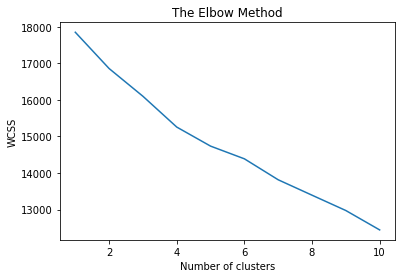

In [21]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [22]:
kmeans = KMeans(n_clusters = 4, n_init = 20, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(X3)
# We look at 3 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


0 : http, for, in, the, of, reut, nbcnews, well, nyti, health, wp, lat, ebola, may, with, and, new, study, pbs, ow, cancer, from, is, your, risk
1 : http, your, fda, is, in, how, help, heart, health, get, from, for, ebola, you, drug, care, cancer, can, be, at, as, are, and, after, it
2 : on, http, the, to, reut, ebola, in, health, of, nyti, for, and, nbcnews, new, is, lat, with, your, may, more, drug, study, fda, get, how
3 : to, http, reut, in, the, ebola, of, health, for, nyti, how, nbcnews, more, be, lat, study, with, new, may, and, cancer, from, risk, is, well


In [17]:
kmeans = KMeans(n_clusters = 9, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# We look at 5 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


0 : http, for, nbcnews, in, well, of, health, nyti, study, with, and, may, wp, on, bit, ebola, your, you, new, cancer, is, can, more, risk, lat
1 : reut, http, ebola, to, in, drug, for, of, may, on, cancer, with, says, study, after, over, stage, as, health, from, million, fda, new, trial, treatment
2 : to, the, http, of, in, health, new, for, and, on, how, nyti, your, ebola, well, is, linked, nbcnews, ways, with, you, age, be, old, lat
3 : ow, http, fitness, beauty, weightloss, recipes, workout, breakfast, recipeoftheday, fitsugar, summer, calories, healthy, and, salad, chocolate, stress, recipe, goodhealth, depression, free, day, to, study, health
4 : http, pbs, nbcnews, wp, yourself, free, food, foods, for, found, four, fresh, from, fruit, fun, future, gain, focus, florida, flu, gear, fix, five, fitsugar, fitness
5 : khne, http, obamacare, by, mandate, hhs, gov, law, health, risk, approval, drugs, exchange, hospital, plans, of, ruling, month, jennyagold, dog, threat, deadline, websit